<a href="https://colab.research.google.com/github/bidwatrajpokhrel/MLP-HyperparamOptimization/blob/master/2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import display

In [ ]:
#from google.colab import drive # mounts the google drive for a new notebook 
#drive.mount('/content/drive')

In [ ]:
# load the 2 npy files created by the process_yale_images.ipynb 
from numpy import load
import numpy as np
path = '/content/drive/My Drive/BidwatPhotosSample/'
# load array
y = load(path + 'yaleExtB_target.npy')
X  = load(path + 'yaleExtB_data.npy')

In [ ]:
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [ ]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

In [ ]:
# PCA 
nof_prin_components2 = 2  # PARAMETER for optimisation in expereiments
pca2 = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_pca_2 = pca2.transform(X)

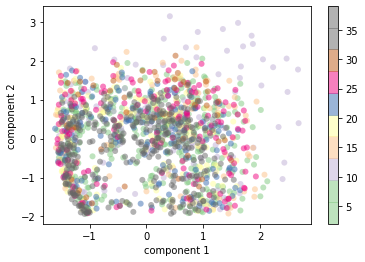

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
nohn = 1200 # nof hidden neurons
solver1 = 'adam'
activation1 = 'relu'

In [ ]:
# train a neural network
print("Fitting the classifier to the training set")
clf_1 = MLPClassifier(hidden_layer_sizes=(nohn,), solver=solver1, activation=activation1, 
                    batch_size=256, verbose=True, 
                    early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.16928328
Validation score: 0.622222
Iteration 2, loss = 1.80312440
Validation score: 0.911111
Iteration 3, loss = 0.89734312
Validation score: 0.970370
Iteration 4, loss = 0.40665941
Validation score: 0.962963
Iteration 5, loss = 0.19711967
Validation score: 0.962963
Iteration 6, loss = 0.11130077
Validation score: 0.962963
Iteration 7, loss = 0.06960337
Validation score: 0.962963
Iteration 8, loss = 0.04747550
Validation score: 0.970370
Iteration 9, loss = 0.03581050
Validation score: 0.970370
Iteration 10, loss = 0.02838703
Validation score: 0.970370
Iteration 11, loss = 0.02341959
Validation score: 0.970370
Iteration 12, loss = 0.01978057
Validation score: 0.970370
Iteration 13, loss = 0.01743921
Validation score: 0.970370
Iteration 14, loss = 0.01521939
Validation score: 0.970370
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [ ]:
y_pred = clf_1.predict(X_test_pca) # reoognises the test ima94ges 
print(classification_report(y_test, y_pred)) # the recognition accuracy

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       0.86      0.86      0.86         7
         5.0       1.00      1.00      1.00         5
         6.0       1.00      0.71      0.83         7
         7.0       1.00      0.82      0.90        11
         8.0       0.80      1.00      0.89         4
         9.0       1.00      1.00      1.00         3
        11.0       0.67      1.00      0.80         2
        12.0       0.86      1.00      0.92         6
        13.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00         3
        17.0       1.00      1.00      1.00         6
        18.0       1.00      1.00      1.00         4
        20.0       1.00      0.62      0.77         8
        22.0       1.00      1.00      1.00         5
        23.0       0.86    

In [ ]:
# train a neural network
print("Fitting the classifier to the training set")
clf_2 = MLPClassifier(hidden_layer_sizes=(nohn,), solver=solver1, activation=activation1, 
                    batch_size=256, verbose=True, 
                    early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.07593961
Validation score: 0.659259
Iteration 2, loss = 1.72194616
Validation score: 0.881481
Iteration 3, loss = 0.83186035
Validation score: 0.925926
Iteration 4, loss = 0.37228525
Validation score: 0.933333
Iteration 5, loss = 0.18163013
Validation score: 0.948148
Iteration 6, loss = 0.10126425
Validation score: 0.955556
Iteration 7, loss = 0.06412011
Validation score: 0.962963
Iteration 8, loss = 0.04435417
Validation score: 0.962963
Iteration 9, loss = 0.03380480
Validation score: 0.955556
Iteration 10, loss = 0.02656560
Validation score: 0.955556
Iteration 11, loss = 0.02206263
Validation score: 0.955556
Iteration 12, loss = 0.01885557
Validation score: 0.955556
Iteration 13, loss = 0.01629197
Validation score: 0.948148
Iteration 14, loss = 0.01456961
Validation score: 0.948148
Iteration 15, loss = 0.01293203
Validation score: 0.948148
Iteration 16, loss = 0.01175907
Validation score: 0.940741
Iteration 17, loss = 0

In [ ]:
y_pred = clf_2.predict(X_test_pca) # reoognises the test images 
print(classification_report(y_test, y_pred)) # the recognition accuracy
#display .Javascript("google.colab.output.setIframeHeight('400px');")

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00         5
         6.0       1.00      0.86      0.92         7
         7.0       1.00      1.00      1.00        11
         8.0       1.00      1.00      1.00         4
         9.0       1.00      1.00      1.00         3
        11.0       1.00      1.00      1.00         2
        12.0       1.00      1.00      1.00         6
        13.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00         3
        17.0       1.00      1.00      1.00         6
        18.0       1.00      1.00      1.00         4
        20.0       1.00      0.88      0.93         8
        22.0       1.00      1.00      1.00         5
        23.0       1.00    

In [ ]:
# train a neural network
print("Fitting the classifier to the training set")
clf_3 = MLPClassifier(hidden_layer_sizes=(nohn,), solver=solver1, activation=activation1, 
                    batch_size=256, verbose=True, 
                    early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.11388877
Validation score: 0.555556
Iteration 2, loss = 1.75605074
Validation score: 0.814815
Iteration 3, loss = 0.86594816
Validation score: 0.918519
Iteration 4, loss = 0.39273717
Validation score: 0.940741
Iteration 5, loss = 0.19564475
Validation score: 0.955556
Iteration 6, loss = 0.11303550
Validation score: 0.962963
Iteration 7, loss = 0.07218620
Validation score: 0.970370
Iteration 8, loss = 0.05136712
Validation score: 0.977778
Iteration 9, loss = 0.03920685
Validation score: 0.977778
Iteration 10, loss = 0.03109220
Validation score: 0.977778
Iteration 11, loss = 0.02567067
Validation score: 0.985185
Iteration 12, loss = 0.02216977
Validation score: 0.985185
Iteration 13, loss = 0.01938196
Validation score: 0.985185
Iteration 14, loss = 0.01716266
Validation score: 0.977778
Iteration 15, loss = 0.01525983
Validation score: 0.977778
Iteration 16, loss = 0.01387060
Validation score: 0.977778
Iteration 17, loss = 0

In [ ]:
y_pred = clf_3.predict(X_test_pca) # reoognises the test images 
print(classification_report(y_test, y_pred)) # the recognition accuracy

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00         5
         6.0       1.00      0.86      0.92         7
         7.0       1.00      1.00      1.00        11
         8.0       1.00      1.00      1.00         4
         9.0       1.00      1.00      1.00         3
        11.0       1.00      1.00      1.00         2
        12.0       1.00      1.00      1.00         6
        13.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00         3
        17.0       1.00      1.00      1.00         6
        18.0       1.00      1.00      1.00         4
        20.0       1.00      0.88      0.93         8
        22.0       1.00      1.00      1.00         5
        23.0       1.00    

In [ ]:
# train a neural network
print("Fitting the classifier to the training set")
clf_4 = MLPClassifier(hidden_layer_sizes=(nohn,), solver=solver1, activation=activation1, 
                    batch_size=256, verbose=True, 
                    early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.12512160
Validation score: 0.629630
Iteration 2, loss = 1.78846826
Validation score: 0.888889
Iteration 3, loss = 0.89050002
Validation score: 0.948148
Iteration 4, loss = 0.41151054
Validation score: 0.977778
Iteration 5, loss = 0.20360461
Validation score: 0.977778
Iteration 6, loss = 0.11587409
Validation score: 0.977778
Iteration 7, loss = 0.07452242
Validation score: 0.985185
Iteration 8, loss = 0.05339287
Validation score: 0.985185
Iteration 9, loss = 0.04028003
Validation score: 0.985185
Iteration 10, loss = 0.03237332
Validation score: 0.992593
Iteration 11, loss = 0.02694664
Validation score: 0.992593
Iteration 12, loss = 0.02321273
Validation score: 0.992593
Iteration 13, loss = 0.02031014
Validation score: 0.992593
Iteration 14, loss = 0.01786030
Validation score: 0.992593
Iteration 15, loss = 0.01614743
Validation score: 0.992593
Iteration 16, loss = 0.01439928
Validation score: 0.992593
Iteration 17, loss = 0

In [ ]:
y_pred = clf_4.predict(X_test_pca) # reoognises the test images 
print(classification_report(y_test, y_pred)) # the recognition accuracy

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00         5
         6.0       1.00      1.00      1.00         7
         7.0       1.00      1.00      1.00        11
         8.0       1.00      0.75      0.86         4
         9.0       1.00      1.00      1.00         3
        11.0       1.00      1.00      1.00         2
        12.0       1.00      1.00      1.00         6
        13.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00         3
        17.0       1.00      1.00      1.00         6
        18.0       1.00      1.00      1.00         4
        20.0       1.00      0.88      0.93         8
        22.0       1.00      1.00      1.00         5
        23.0       1.00    

In [ ]:
# train a neural network
print("Fitting the classifier to the training set")
clf_5 = MLPClassifier(hidden_layer_sizes=(nohn,), solver=solver1, activation=activation1,batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.18116579
Validation score: 0.525926
Iteration 2, loss = 1.81714512
Validation score: 0.859259
Iteration 3, loss = 0.90483929
Validation score: 0.925926
Iteration 4, loss = 0.41449533
Validation score: 0.955556
Iteration 5, loss = 0.19981610
Validation score: 0.962963
Iteration 6, loss = 0.11105577
Validation score: 0.962963
Iteration 7, loss = 0.07025864
Validation score: 0.970370
Iteration 8, loss = 0.04888613
Validation score: 0.970370
Iteration 9, loss = 0.03626929
Validation score: 0.962963
Iteration 10, loss = 0.02893216
Validation score: 0.962963
Iteration 11, loss = 0.02415258
Validation score: 0.962963
Iteration 12, loss = 0.02054018
Validation score: 0.962963
Iteration 13, loss = 0.01788264
Validation score: 0.962963
Iteration 14, loss = 0.01584775
Validation score: 0.962963
Iteration 15, loss = 0.01432092
Validation score: 0.962963
Iteration 16, loss = 0.01310240
Validation score: 0.962963
Iteration 17, loss = 0

In [ ]:
y_pred = clf_5.predict(X_test_pca) # reoognises the test images 
print(classification_report(y_test, y_pred)) # the recognition accuracy

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00         5
         6.0       1.00      1.00      1.00         7
         7.0       1.00      1.00      1.00        11
         8.0       1.00      1.00      1.00         4
         9.0       1.00      1.00      1.00         3
        11.0       1.00      1.00      1.00         2
        12.0       1.00      1.00      1.00         6
        13.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00         3
        17.0       1.00      1.00      1.00         6
        18.0       1.00      1.00      1.00         4
        20.0       1.00      0.88      0.93         8
        22.0       1.00      1.00      1.00         5
        23.0       1.00    

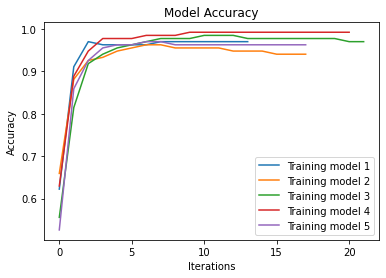

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clf_1.validation_scores_)
plt.plot(clf_2.validation_scores_)
plt.plot(clf_3.validation_scores_)
plt.plot(clf_4.validation_scores_)
plt.plot(clf_5.validation_scores_)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend(['Training model 1','Training model 2','Training model 3','Training model 4','Training model 5'])
plt.show()

Confusion Matrix
[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  1  0  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  1]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  

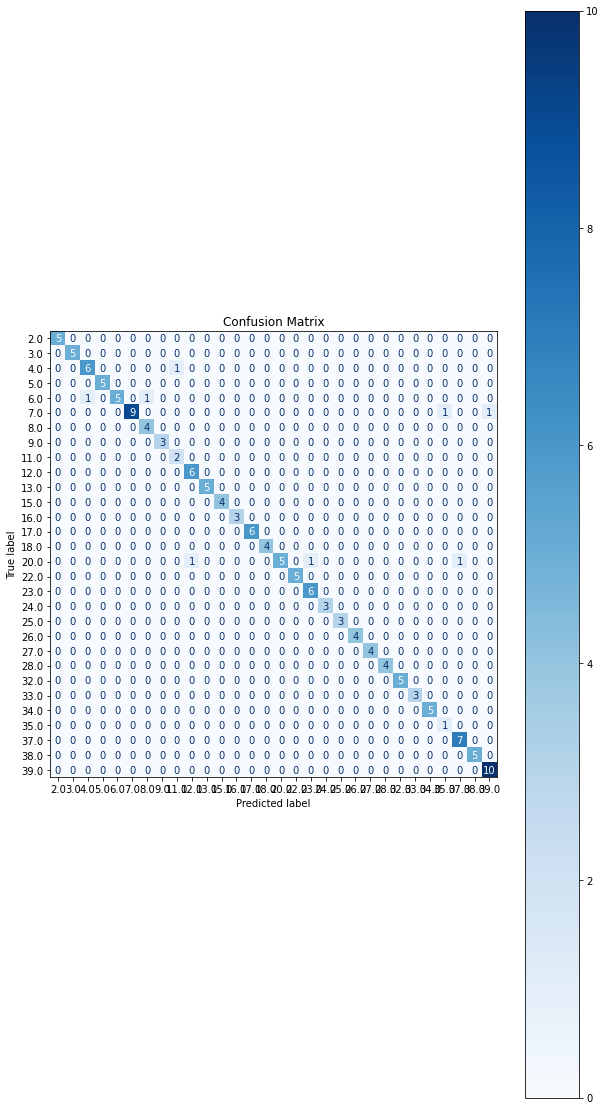

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (10,20)
disp = plot_confusion_matrix(clf_1, X_test_pca, y_test, cmap=plt.cm.Blues,  normalize=None )
disp.ax_.set_title("Confusion Matrix")
print("Confusion Matrix")
print(disp.confusion_matrix)
plt.show()
